In [1]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [2]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_woods

maze = gym.make('Woods1-v0')
print("This is how maze looks like")
situation = maze.reset()
print(type(situation))
print(situation)
maze.render()


This is how maze looks like
<class 'list'>
['.', '.', '.', '.', '.', '.', '.', 'O']

□ □ □ X □
□ □ □ □ □
■ ■ $ □ □
■ ■ ■ □ □
■ ■ ■ □ □


In [3]:
from lcs.agents.xncs import Configuration
from utils.nxcs_utils import *

cfg = Configuration(number_of_actions=8,
                    max_population=1800,
                    learning_rate=0.2, # beta
                    epsilon_0=0.01,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.08, # mu
                    delta=0.1,
                    ga_threshold=25,
                    deletion_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=0.8,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction = 10,  # p_i
                    initial_error = 0.1,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xncs_metrics,
                    lmc=10,
                    lem=20
                    )

In [4]:
from utils.nxcs_utils import avg_experiment as XNCSExp

number_of_experiments = 1
explore = 0
exploit = 2500

df = XNCSExp(
    maze=maze,
    cfg=cfg,
    number_of_tests=number_of_experiments,
    explore_trials=explore,
    exploit_trials=exploit,
    pre_generate=True
    )

Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 1, 'reward': 1000.0, 'perf_time': 0.0101880999999997, 'numerosity': 1800, 'population': 1622, 'average_specificity': 8.035, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 8, 'reward': 1078.3271337169067, 'perf_time': 0.09919509999999931, 'numerosity': 1800, 'population': 1548, 'average_specificity': 10.86, 'fraction_accuracy': 0.18455530966912712}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 7, 'reward': 1101.748979356001, 'perf_time': 0.09865720000000522, 'numerosity': 1800, 'population': 1568, 'average_specificity': 10.797222222222222, 'fraction_accuracy': 0.2016524165428857}
INFO:lcs.agents.Agent:{'trial': 700, 'steps_in_trial': 6, 'reward': 1164.1117384164033, 'perf_time': 0.09157989999999927, 'numerosity': 1800, 'population': 1588, 'average_specificity': 12.010555555555555, 'fraction_accuracy': 0.20585388697704013}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 9, 'reward': 10

In [5]:
display(df)

,steps_in_trial,reward,perf_time,numerosity,population,average_specificity,fraction_accuracy
trial,,,,,,,
0,1,1000.000000,0.010188,1800,1622,8.035000,0.000000
100,5,1199.143807,0.059476,1800,1559,8.187222,0.158505
200,8,1078.327134,0.099195,1800,1548,10.860000,0.184555
300,6,1146.002447,0.058881,1800,1568,11.231667,0.174072
400,6,1156.553744,0.083473,1800,1567,10.896667,0.185611
500,7,1101.748979,0.098657,1800,1568,10.797222,0.201652
600,8,1124.513090,0.118927,1800,1571,11.238889,0.199141
700,6,1164.111738,0.091580,1800,1588,12.010556,0.205854
800,6,1140.810820,0.077319,1800,1593,12.420000,0.203512


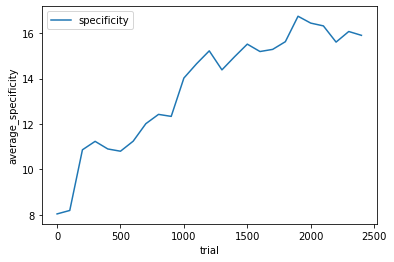

In [6]:
import pandas as pd
import numpy as np

ax = df['average_specificity'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("average_specificity")
ax.legend(["specificity"])


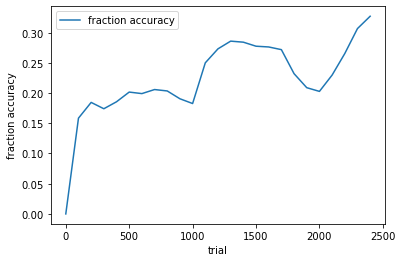

In [7]:
ax = df['fraction_accuracy'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("fraction accuracy")
ax.legend(["fraction accuracy"])

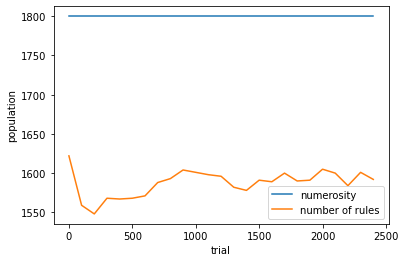

In [8]:
ax = df[['numerosity', 'population']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["numerosity", "number of rules"])

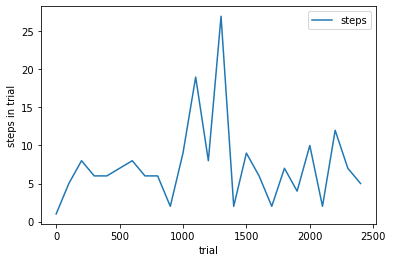

In [9]:
ax = df['steps_in_trial'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps in trial")
ax.legend(["steps"])

In [10]:
print(sum(df['steps_in_trial'])/number_of_experiments)

184.0
